In [4]:
# Copyright 2018-2020 Erasmus+ ICCT Project Consortium
#
# Redistribution and use in source and binary forms, with or without modification, 
# are permitted provided that the following conditions are met:
#
# 1. Redistributions of source code must retain the above copyright notice, 
# this list of conditions and the following disclaimer.
#
# 2. Redistributions in binary form must reproduce the above copyright notice, 
# this list of conditions and the following disclaimer in the documentation and/or 
# other materials provided with the distribution.
#
# 3. Neither the name of the copyright holder nor the names of its contributors
# may be used to endorse or promote products derived from this software without specific prior written permission.
#
# THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS" AND ANY EXPRESS OR IMPLIED WARRANTIES, 
# INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE DISCLAIMED.
# IN NO EVENT SHALL THE COPYRIGHT HOLDER OR CONTRIBUTORS BE LIABLE FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, 
# OR CONSEQUENTIAL DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES; LOSS OF USE, DATA, 
# OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY, 
# OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE OF THIS SOFTWARE, EVEN IF ADVISED OF THE 
# POSSIBILITY OF SUCH DAMAGE.

In [5]:
from IPython.display import HTML

# # Cell visibility - COMPLETE:
# tag = HTML('''<style> div.input {display:none;} </style>''')

#Cell visibility - TOGGLE:
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.input').hide()
    } else {
        $('div.input').show()
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<p style="text-align:right">
Toggle cell visibility <a href="javascript:code_toggle()">here</a>.</p>''')

display(tag)

In [6]:
%matplotlib notebook
import scipy.signal as signal
import matplotlib.pyplot as plt
from ipywidgets import widgets
from ipywidgets import interact
import numpy as np
import sympy as sym

## PID controller - time response

A proportional–integral–derivative (PID) control algorithm is by far the most common control algorithm. Its transfer function is

\begin{equation}
    P(s)=K_p \cdot \left( 1 + \frac{1}{T_i s} + T_d s \right).
\end{equation}

It is made as a sum of proportional, integral and derivative channels. Not all of them have to be present, so PI or PD control algorithms are also used. In this example the response of a P, PI, PD or PID controller is shown for step, impulse, ramp or sine input.

---

### How to use this notebook?
1. Toggle between *unit step function*, *unit impulse function*, *unit ramp function* and *sine function* to select the input signal.
2. Click on the *P*, *PI*, *PD* or *PID* button to toogle between proportional, proportional-integral, proportional-derivative or proportional–integral–derivative control algorithm types.
3. Move the sliders to change the values of proportional ($K_p$), integral ($T_i$) and derivative ($T_d$) PID tunning coefficients.
4. Move the slider $t_{max}$ to change the maximum value of the time on x axis.

<IPython.core.display.Javascript object>


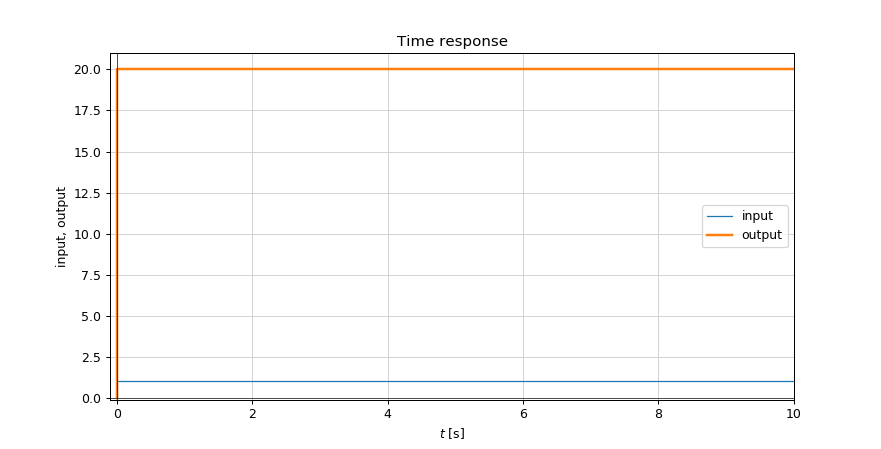

ToggleButtons(description='Select the input signal:', options=('unit step function', 'unit impulse function', …

ToggleButtons(description='Select the control algorithm type:', options=('P', 'PI', 'PD', 'PID'), style=Toggle…

interactive(children=(IntSlider(value=20, description='\\(K_p \\)', min=1, readout_format='.1d'), FloatSlider(…

In [7]:
a = 0.1

# make figure
fig = plt.figure(figsize=(9.8, 5),num='PID controller')
# add axes
ax = fig.add_subplot(111)
ax.grid(which='both', axis='both', color='lightgray')
ax.set_title('Time response')
# plot step function and responses (initalisation)
input_plot, = ax.plot([],[],'C0', linewidth=1,label='input')
response_plot, = ax.plot([],[], 'C1', linewidth=2,label='output')
ax.axhline(linewidth=.5, color='k')
ax.axvline(linewidth=.5, color='k')
ax.legend()

ax.set_xlabel('$t$ [s]')
ax.set_ylabel('input, output')
plt.show()

P, I, D, s = sym.symbols('P, I, D, s')

input_type = 'unit step function' #input function
Time_span = 10 # max time on x-axis plot

#initialize global variables
KP = 1.
TI = 1.
TD = 1.
num = []
den = []

def update_plot():
    global num, den, input_type, Time_span
    num_temp = [float(i.subs(P,KP).subs(I,TI).subs(D,TD)) for i in num]
    den_temp = [float(i.subs(P,KP).subs(I,TI).subs(D,TD)) for i in den]
    
    system = signal.TransferFunction(num_temp, den_temp)
    
    #time, response = signal.step(system) #only for setting time borders (for nicer plot. could also calculate dominant frequency)
    #time = np.linspace(0,time[-1],1000)
    time = np.linspace(0, Time_span, 600)
    
    if input_type == 'unit step function':
        u = np.ones_like(time)
        u = np.concatenate((np.array([0]),u))
        time, response = signal.step(system, T=time)
        time = np.concatenate((np.array([0]), time))
        response = np.concatenate((np.array([0]), response))
    elif input_type == 'unit impulse function':
        u = np.zeros_like(time)
        u = np.concatenate((np.array([10]), u))
        time, response = signal.impulse(system, T=time)
        time = np.concatenate((np.array([0]), time))
        response = np.concatenate((np.array([0]), response))
    elif input_type == 'sine function':
        u = np.sin(time*2*np.pi)
        time, response, _ = signal.lsim(system, U=u, T=time)
    elif input_type == 'unit ramp function':
        u = time
        time, response, _ = signal.lsim(system, U=u, T=time)
    else:
        raise Exception("Error in the program. Please restart simulation.")
    
    response_plot.set_data(time, response)
    input_plot.set_data(time, u)
    ax.set_ylim([min([np.min(u), min(response),-.1]),min(100,max([max(response)*1.05, 1, 1.05*np.max(u[1:])]))])
    ax.set_xlim([-0.1,max(time)])
    plt.show()
    

def transfer_func(controller_type):
    global num, den
    proportional = P
    integral = P/(I*s)
    differential = P*D*s/(a*D*s+1)
    if controller_type =='P':
        controller_func = proportional
        Kp_widget.disabled=False
        Ti_widget.disabled=True
        Td_widget.disabled=True
    elif controller_type =='PI':
        controller_func = proportional+integral
        Kp_widget.disabled=False
        Ti_widget.disabled=False
        Td_widget.disabled=True
    elif controller_type == 'PD':
        controller_func = proportional+differential
        Kp_widget.disabled=False
        Ti_widget.disabled=True
        Td_widget.disabled=False
    else:
        controller_func = proportional+integral+differential
        Kp_widget.disabled=False
        Ti_widget.disabled=False
        Td_widget.disabled=False
    system_func = controller_func
    
    num = [sym.fraction(system_func.factor())[0].expand().coeff(s, i) for i in reversed(range(1+sym.degree(sym.fraction(system_func.factor())[0], gen=s)))]
    den = [sym.fraction(system_func.factor())[1].expand().coeff(s, i) for i in reversed(range(1+sym.degree(sym.fraction(system_func.factor())[1], gen=s)))]
    update_plot()
    
def func(Kp, Ti, Td, time_span):
    global KP, TI, TD, Time_span
    KP = Kp
    TI = Ti
    TD = Td
    Time_span = time_span
    update_plot()
    
style = {'description_width': 'initial'}

def buttons_controller_clicked(event):
    controller = buttons_controller.options[buttons_controller.index]
    transfer_func(controller)
buttons_controller = widgets.ToggleButtons(
    options=['P', 'PI', 'PD', 'PID'],
    description='Select the control algorithm type:',
    disabled=False,
    style=style)
buttons_controller.observe(buttons_controller_clicked)

def buttons_input_clicked(event):
    global input_type
    input_type = buttons_input.options[buttons_input.index]
    update_plot()
buttons_input = widgets.ToggleButtons(
    options=['unit step function','unit impulse function', 'unit ramp function', 'sine function'],
    description='Select the input signal:',
    disabled=False,
    style=style)
buttons_input.observe(buttons_input_clicked)


Kp_widget = widgets.IntSlider(value=20,min=1,max=100,step=1,description=r'\(K_p \)',
    disabled=False,continuous_update=True,orientation='horizontal',readout=True,readout_format='.1d')
Ti_widget = widgets.FloatSlider(value=.1,min=0.001,max=3.,step=0.001,description=r'\(T_{i} \)',
    disabled=False,continuous_update=True,orientation='horizontal',readout=True,readout_format='.3f')
Td_widget = widgets.FloatSlider(value=.1,min=0.001,max=3.,step=0.001,description=r'\(T_{d} \)',
    disabled=False,continuous_update=True,orientation='horizontal',readout=True,readout_format='.3f')

time_span_widget = widgets.FloatSlider(value=10.,min=.5,max=50.,step=0.1,description=r'\(t_{max} \)',
    disabled=False,continuous_update=True,orientation='horizontal',readout=True,readout_format='.1f')

transfer_func('P')

display(buttons_input)
display(buttons_controller)

interact(func, Kp=Kp_widget, Ti=Ti_widget, Td=Td_widget, time_span=time_span_widget);